# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [244]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [245]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/BigAnalysis'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()

Loading Data from ./Data/BigAnalysis
---- Dataset Label Distribution ----
Negative Samples: 6782
False Positive Samples: 242
Positive Samples: 1004

---- Well Content Distribution: ----
Data Wells: 7044
Control Wells: 984


[6782, 242, 1004, 984, 7044]

## Unsupervised
### KMeans

In [246]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [247]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Metrics', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [248]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', random_state = 30, model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [249]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>


## Training and Evaluation

### Training

In [250]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7024
         pos       0.92      0.43      0.59      1004

    accuracy                           0.92      8028
   macro avg       0.92      0.71      0.77      8028
weighted avg       0.92      0.92      0.91      8028

KMeans Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98      7024
         pos       0.81      1.00      0.89      1004

    accuracy                           0.97      8028
   macro avg       0.90      0.98      0.94      8028
weighted avg       0.98      0.97      0.97      8028



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95      7024
         pos       0.60      0.97      0.74      1004

    accuracy                           0.91      8028
   macro avg       0.80      0.94      0.84      8028
weighted avg       0.95      0.91      0.92      8028



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.18      0.30      7024
         pos       0.15      1.00      0.26      1004

    accuracy                           0.28      8028
   macro avg       0.57      0.59      0.28      8028
weighted avg       0.89      0.28      0.30      8028

-------- Results on False Positives for KMeans Raw --------
Accuracy on False Positives: 0.8471074380165289
False Positives Account for 6.09% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.43243243243243
Average RAF: 0.03841413948648649
Average MPR: 13.497430543513516
Average MS: 1063.2567567567567
Correctly Classified FP Characteristics:
Average Time to Threshold: 37.32473170731707
Average RAF: 0.03164910929268293
Average MPR: 7.103047725956096
Average MS: 540.8256097560976


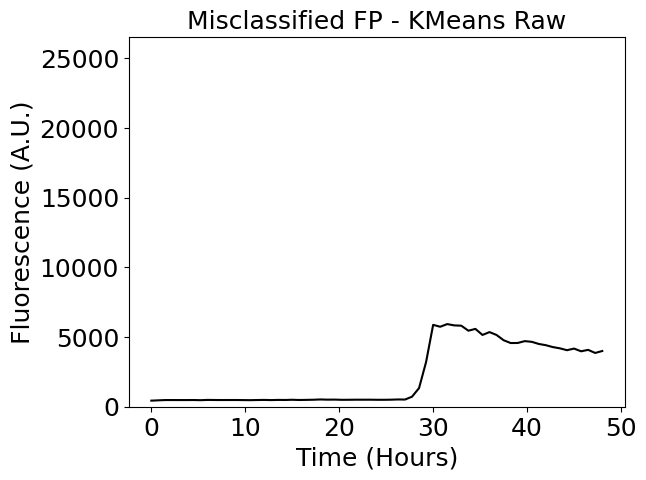

-------- Results on False Positives for KMeans Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.65938016528926
Average RAF: 0.03268343209090909
Average MPR: 8.080701297235537
Average MS: 620.7014462809917
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


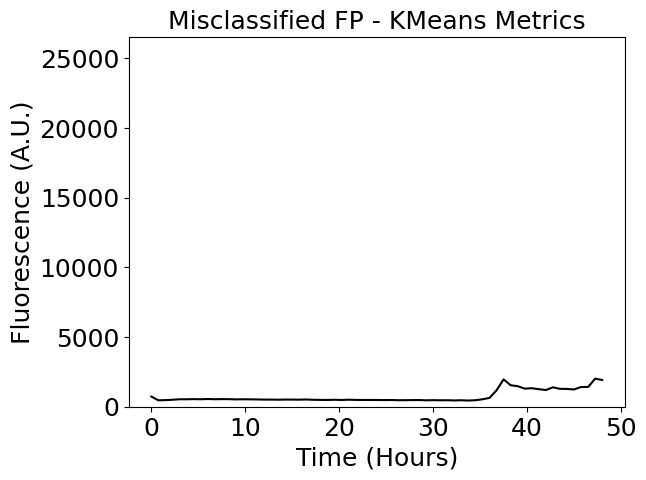

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.23140495867768596
False Positives Account for 26.96% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.431827956989245
Average RAF: 0.03474035737096774
Average MPR: 9.268021261155912
Average MS: 725.266129032258
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.058035714285715
Average RAF: 0.025851501696428573
Average MPR: 4.137102845642857
Average MS: 273.39732142857144


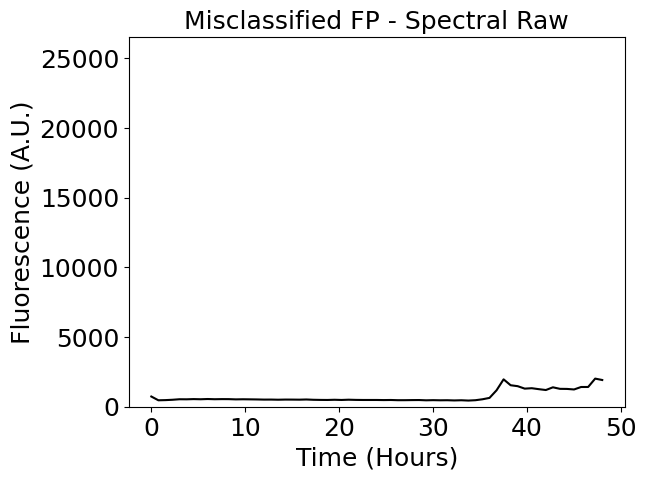

-------- Results on False Positives for Spectral Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 4.19% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.65938016528926
Average RAF: 0.03268343209090909
Average MPR: 8.080701297235537
Average MS: 620.7014462809917
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


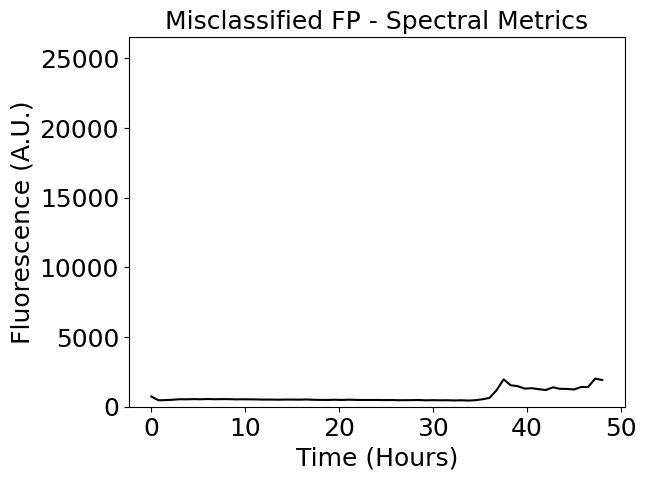

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75


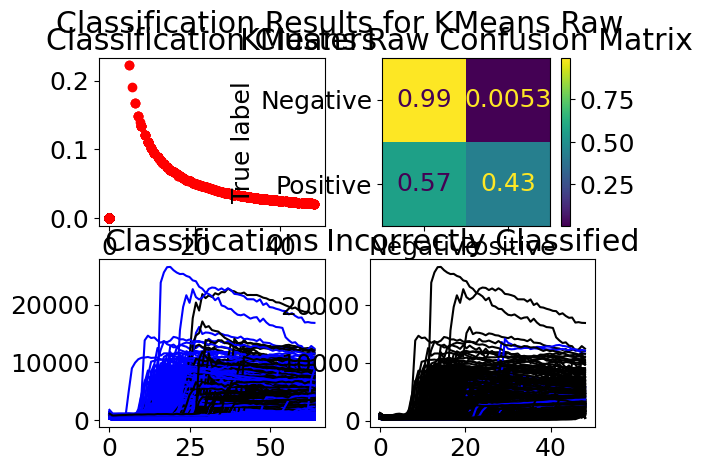

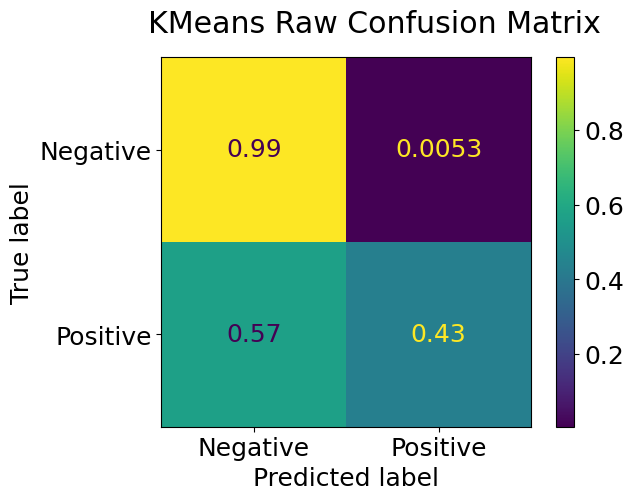

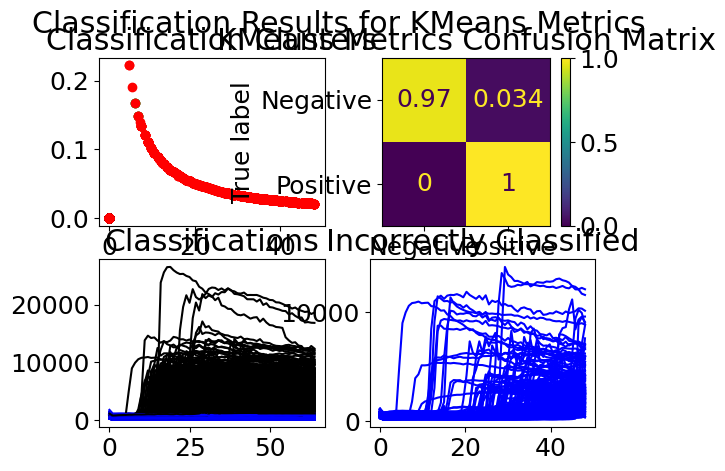

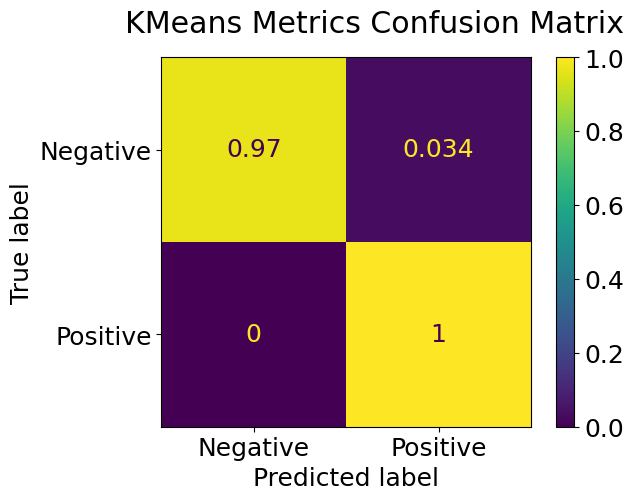

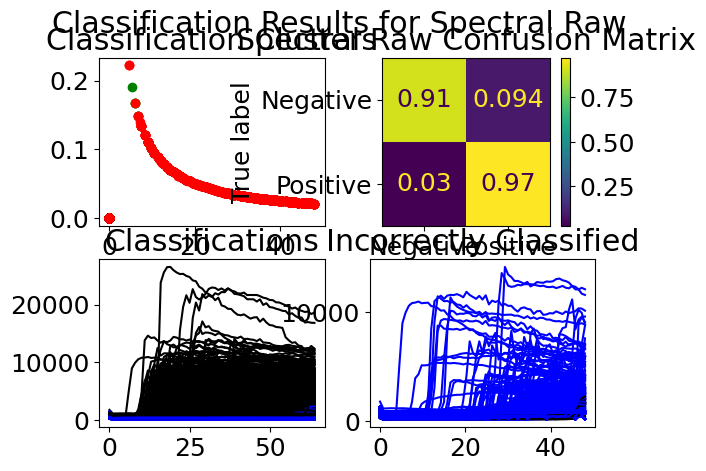

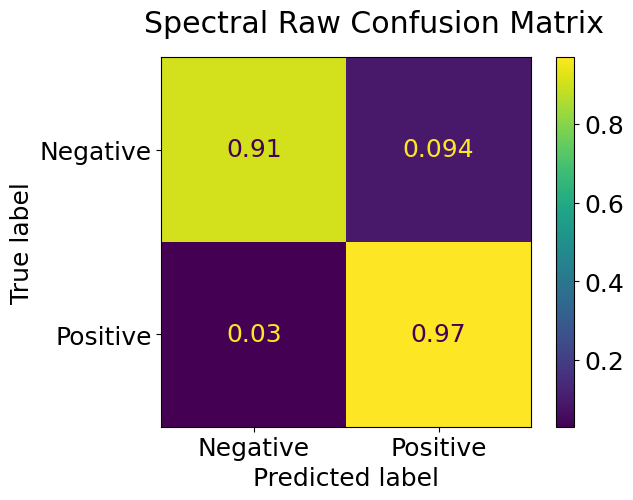

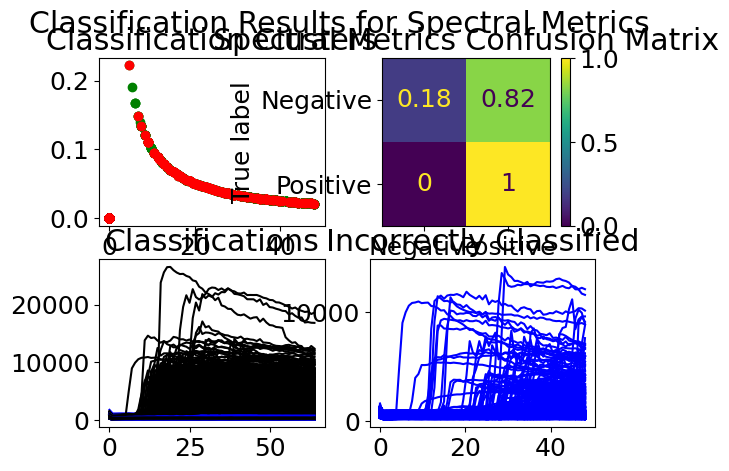

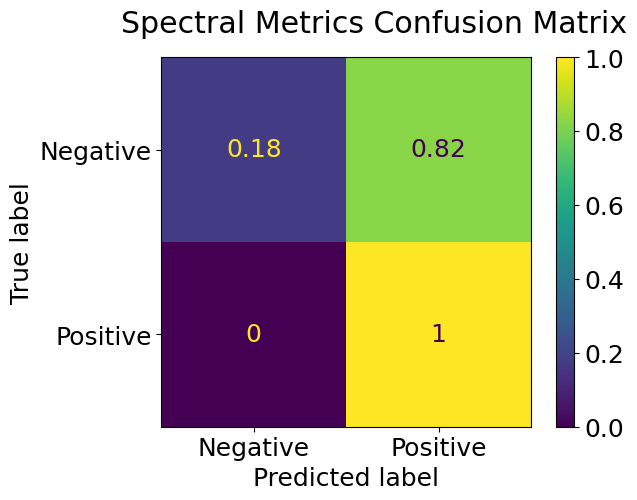

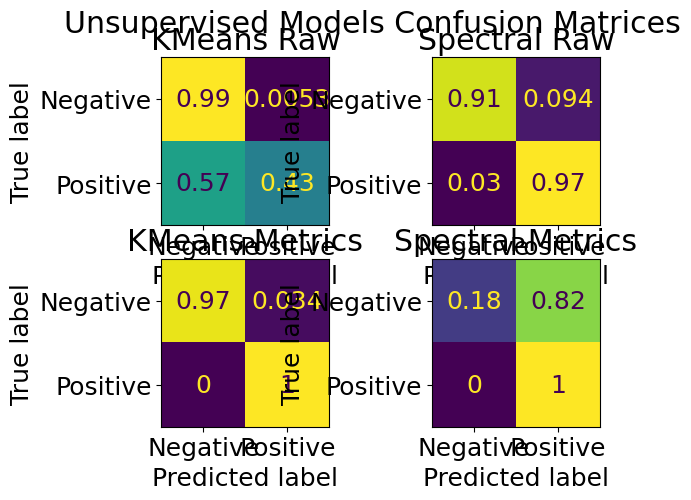

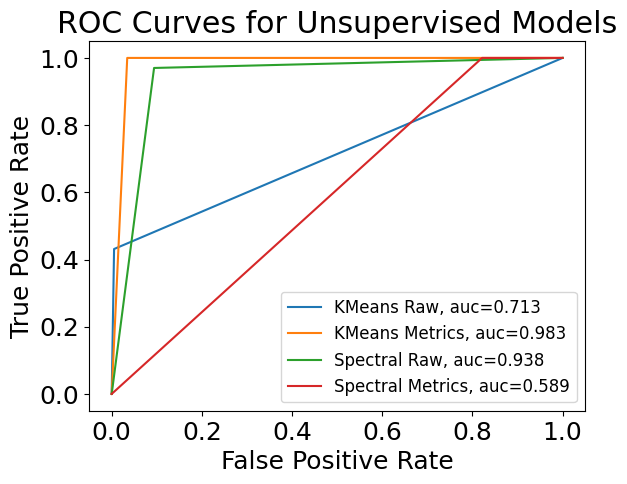

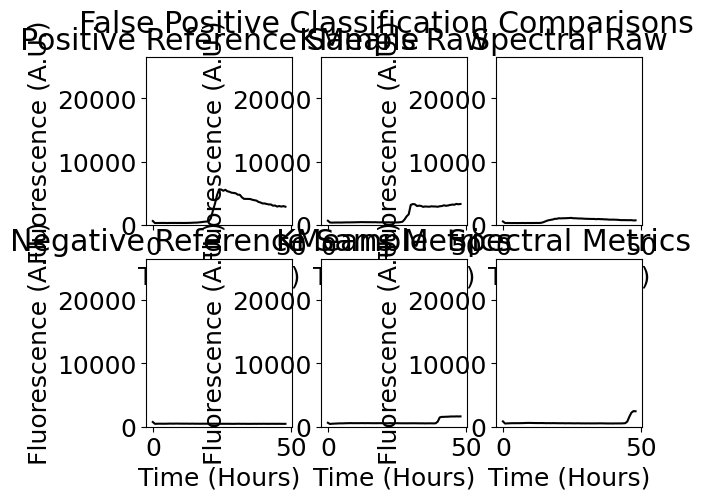

In [251]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       696
         pos       0.87      0.92      0.89       106

    accuracy                           0.97       802
   macro avg       0.93      0.95      0.94       802
weighted avg       0.97      0.97      0.97       802

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       696
         pos       0.86      0.96      0.91       106

    accuracy                           0.98       802
   macro avg       0.93      0.97      0.95       802
weighted avg       0.98      0.98      0.98       802

26/26 [==============================] - 0s 3ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       696
         pos       0.89      0.95      0.92       106

    accuracy                           0.98       802
   macro avg       0.94      0.97      0.95 

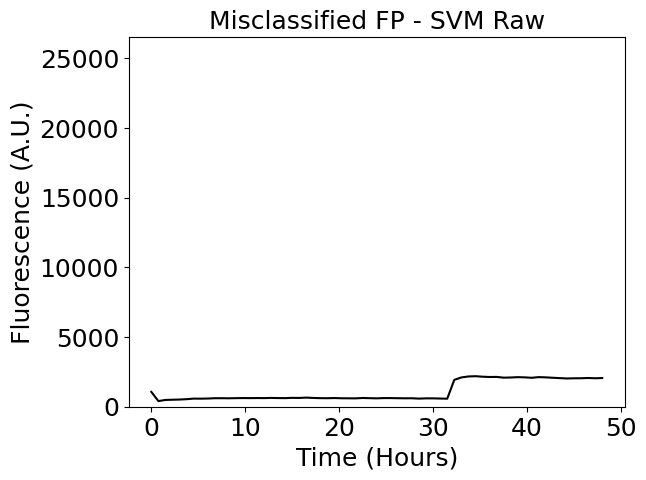

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.42857142857142855
False Positives Account for 80.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.015625
Average RAF: 0.030949126687500002
Average MPR: 8.808714134625
Average MS: 690.484375
Correctly Classified FP Characteristics:
Average Time to Threshold: 35.534166666666664
Average RAF: 0.03198110283333334
Average MPR: 11.966355133083333
Average MS: 546.7916666666666


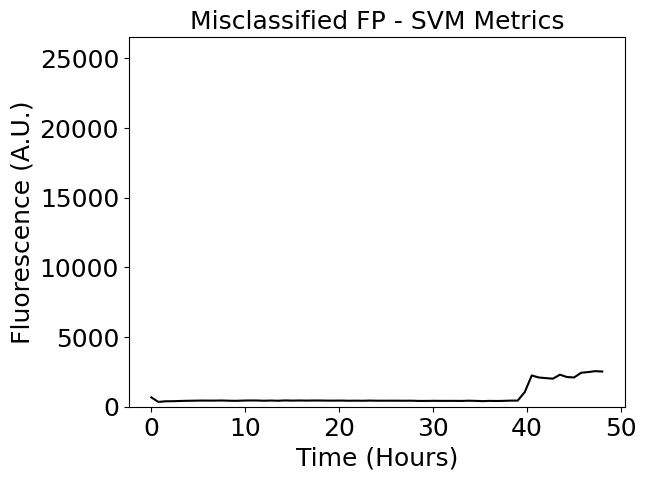

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 4ms/step
Accuracy on False Positives: 0.5357142857142857
False Positives Account for 72.22% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.80769230769231
Average RAF: 0.03169671261538462
Average MPR: 14.42609352153846
Average MS: 856.1538461538462
Correctly Classified FP Characteristics:
Average Time to Threshold: 36.477333333333334
Average RAF: 0.0311267998
Average MPR: 6.466431464733333
Average MS: 431.95


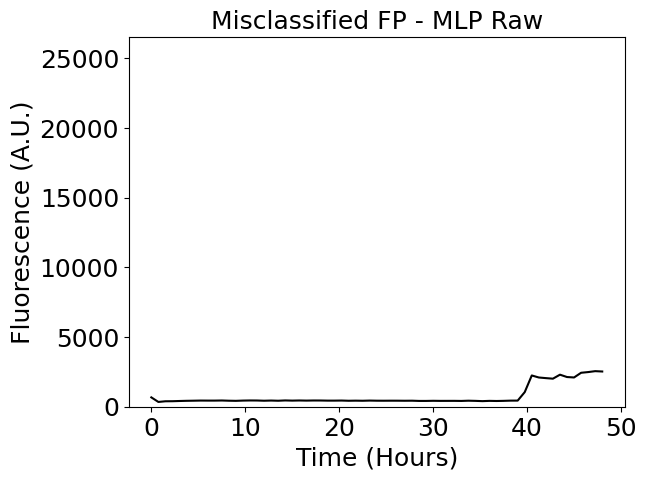

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75
26/26 [==============================] - 0s 5ms/step


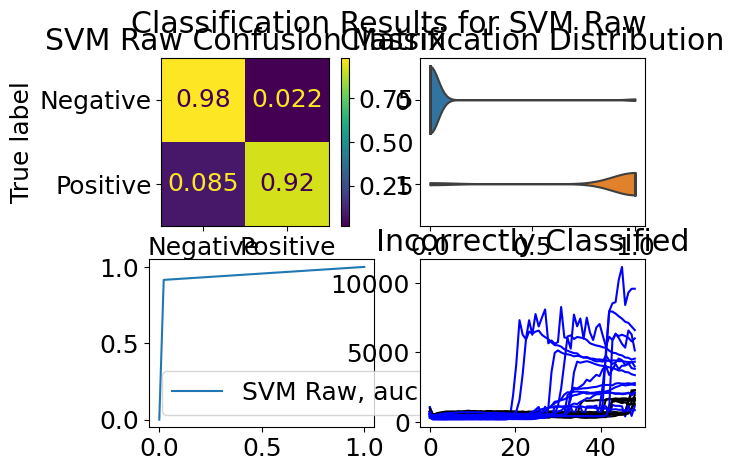

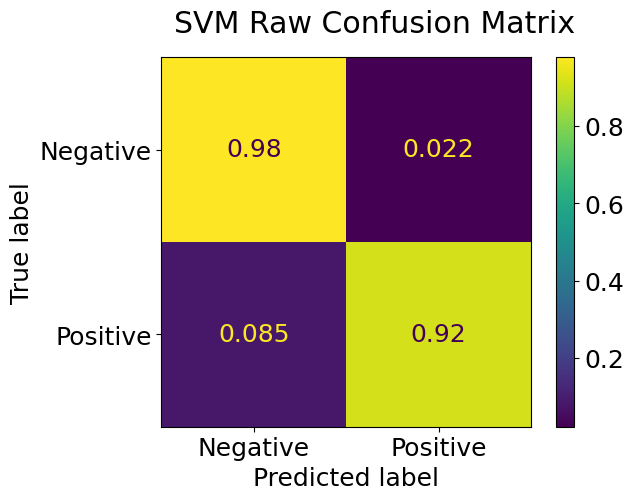

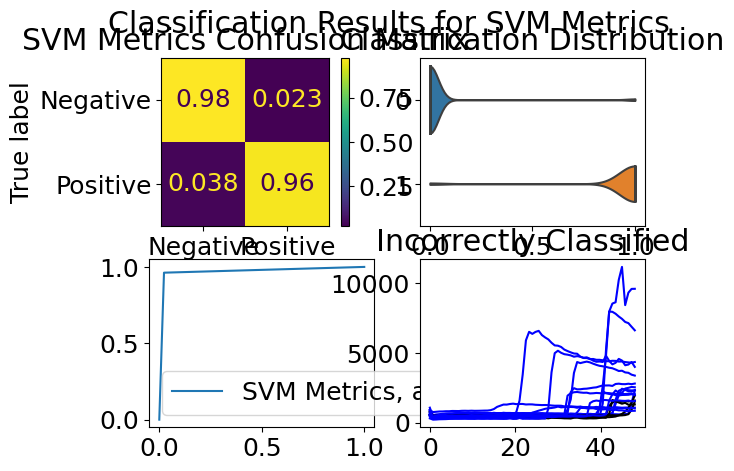

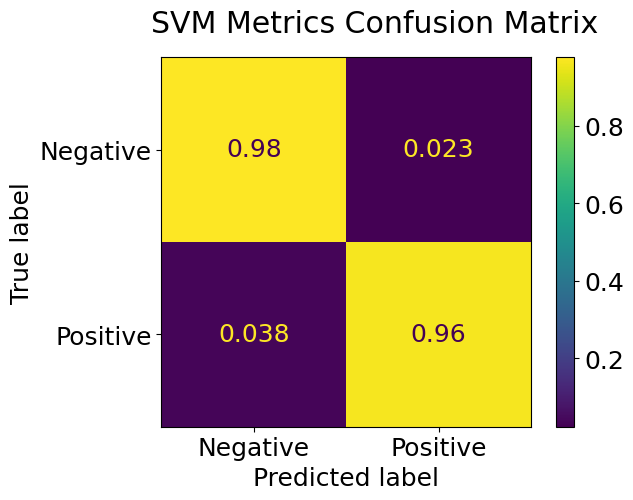

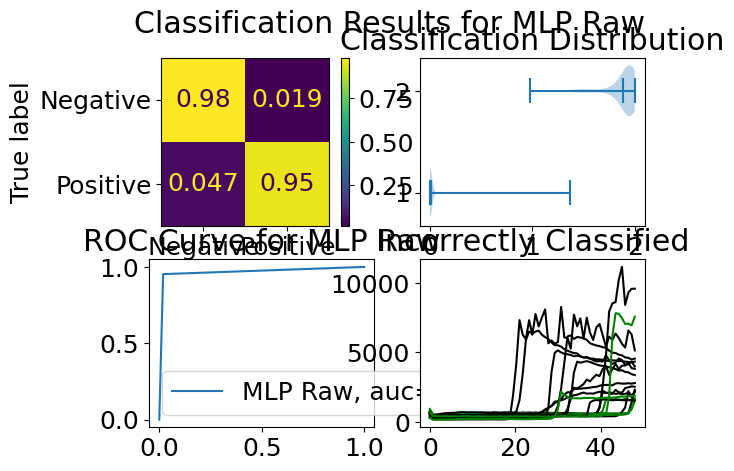

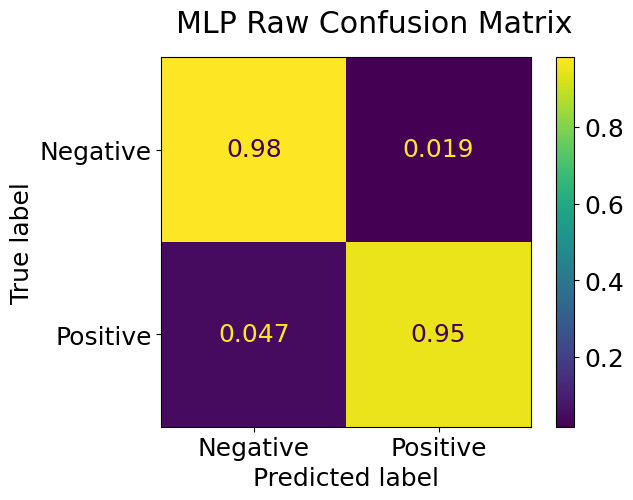

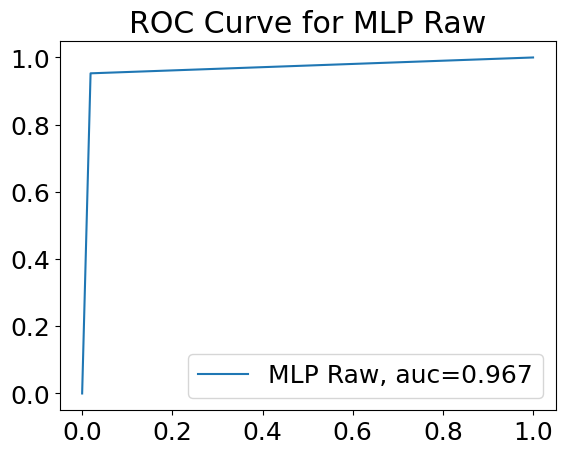

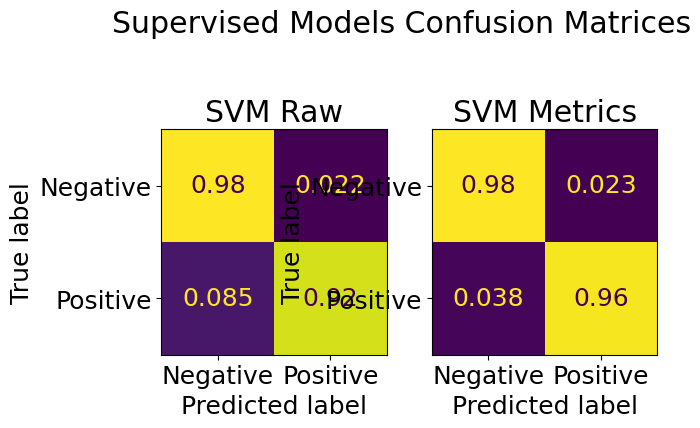

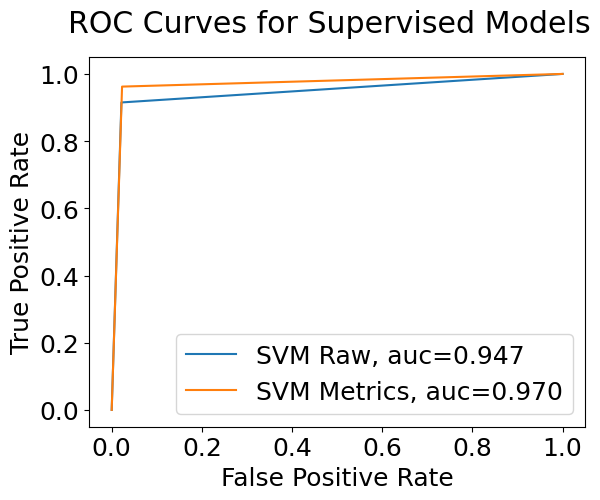

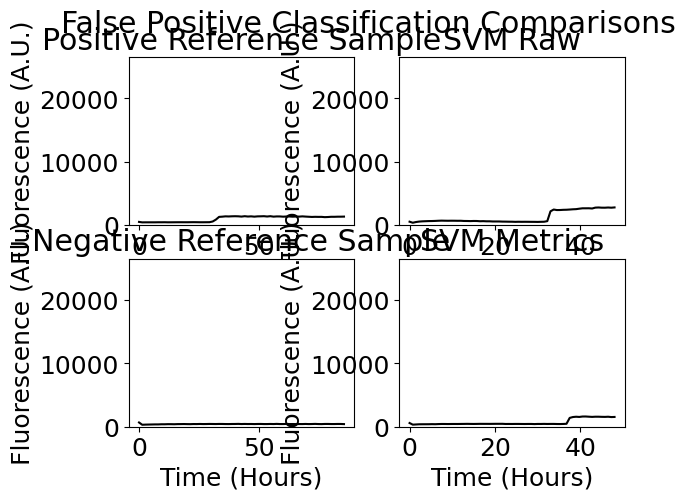

In [252]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

### G-Well Evaluation

In [253]:
### Test on G Wells
ml_quic = ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir='./Data/BigAnalysisGWells');
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3)

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

Loading Data from ./Data/BigAnalysisGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
SVM Raw:
              precision    recall  f1-score   support

         neg       0.85      1.00      0.92       208
         pos       1.00      0.60      0.75        96

    accuracy                           0.88       304
   macro avg       0.92      0.80      0.83       304
weighted avg       0.89      0.88      0.86       304

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.90      1.00      0.95       208
         pos       1.00      0.77      0.87        96

    accuracy                    

{'SVM Raw': '              precision    recall  f1-score   support\n\n         neg       0.85      1.00      0.92       208\n         pos       1.00      0.60      0.75        96\n\n    accuracy                           0.88       304\n   macro avg       0.92      0.80      0.83       304\nweighted avg       0.89      0.88      0.86       304\n',
 'SVM Metrics': '              precision    recall  f1-score   support\n\n         neg       0.90      1.00      0.95       208\n         pos       1.00      0.77      0.87        96\n\n    accuracy                           0.93       304\n   macro avg       0.95      0.89      0.91       304\nweighted avg       0.93      0.93      0.92       304\n',
 'MLP Raw': '              precision    recall  f1-score   support\n\n         neg       0.86      1.00      0.93       208\n         pos       1.00      0.66      0.79        96\n\n    accuracy                           0.89       304\n   macro avg       0.93      0.83      0.86       304\nweig

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Hours')

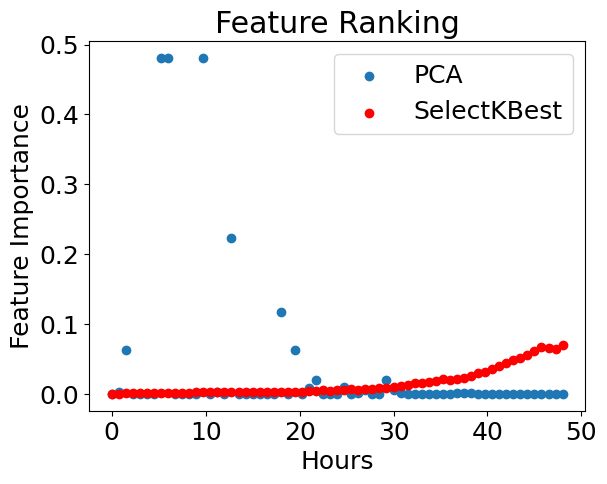

In [254]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)) * 0.75, features)
plt.scatter(np.arange(len(features)) * 0.75, skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Hours')